# Aim 

**We will design a predictive model to predict full-load power output of Combined Cycle Power Plant Dataset from UCI website and evaluate the performance of the model.**

**Includes Linear Regression, its assumptions and regularization. Also Random Forest Regressor model**

https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

# About Data Set

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

# Attribute Info

Features consist of hourly average ambient variables:
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg

Target is:
- Net hourly electrical energy output (PE) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge , Lasso
from sklearn.linear_model import RidgeCV
from statsmodels.stats.descriptivestats import Description
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import normal_ad
import statsmodels.api as sm

# Loading Dataset

In [2]:
df=pd.read_excel("Folds5x2_pp.xlsx")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
df.shape

(9568, 5)

# Summary statistics

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# Checking for outliers

<AxesSubplot:>

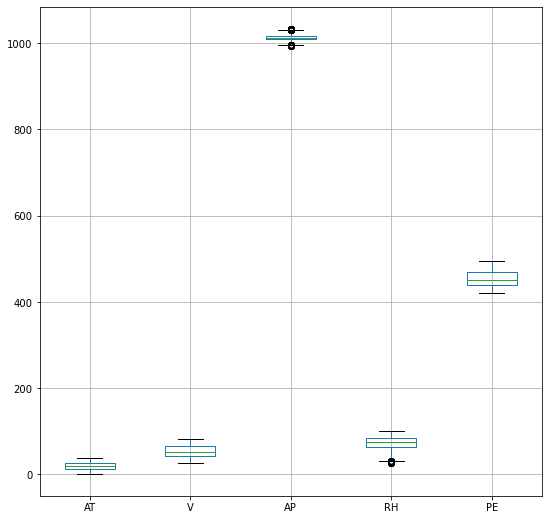

In [5]:
plt.figure(figsize=(9,9))
df.boxplot()

**Closely checking AP and RH as they seem to have outliers in the above graph**

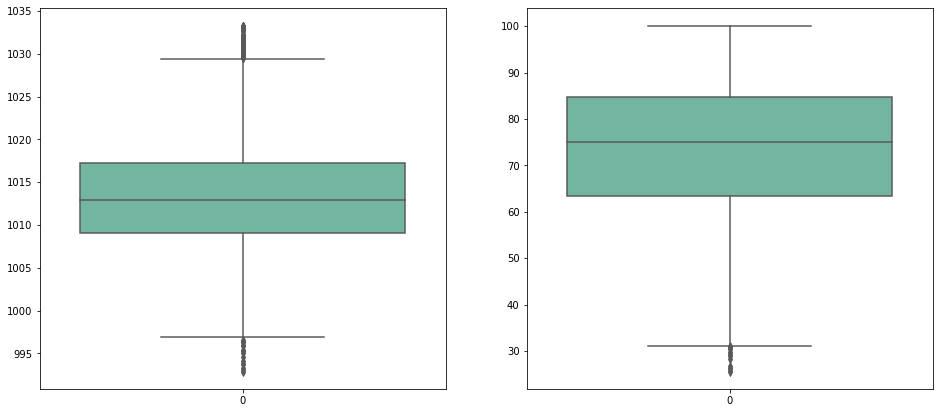

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16,7))
sns.boxplot(data=df["AP"], orient="v", ax=axes[0], palette="Set2")
sns.boxplot(data=df["RH"], orient="v", ax=axes[1], palette="Set2")
plt.show()

# Checking correlation of features with the target (PE)

[]

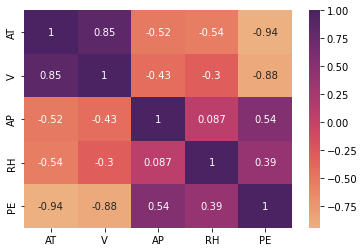

In [8]:
sns.heatmap(df.corr(method="spearman"), annot=True, cmap='flare')
plt.plot()

**We can see that AT and V have a strong negative correlation with the target variable (PE) as their correlation coefficients are -0.94 and -0.88 respectively. AP and RH have a weak positive correlation with PE with correlation coefficients of 0.54 and 0.39.**

In [9]:
X=df.iloc[:,0:4] # Feature matrix
y=df.iloc[:,4]  # Target vector

# Splitting train and test set: (80-20)

In [10]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 4)
(1914, 4)
(7654,)
(1914,)


# Fitting linear model

In [11]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print(pred)
print(lr_model.coef_)
print(lr_model.intercept_)

[445.02123214 487.47174377 475.81523358 ... 437.92724432 479.19784101
 457.12145713]
[-1.97398483 -0.23316933  0.06743523 -0.15685555]
448.9771343455537


In [12]:
print(f"training score--->{lr_model.score(X_train,y_train)}")
print(f"testing score--->{lr_model.score(X_test,y_test)}")

training score--->0.9273635828497193
testing score--->0.9339152531879142


# Assumptions of Linear Regression

## Test for Linearity

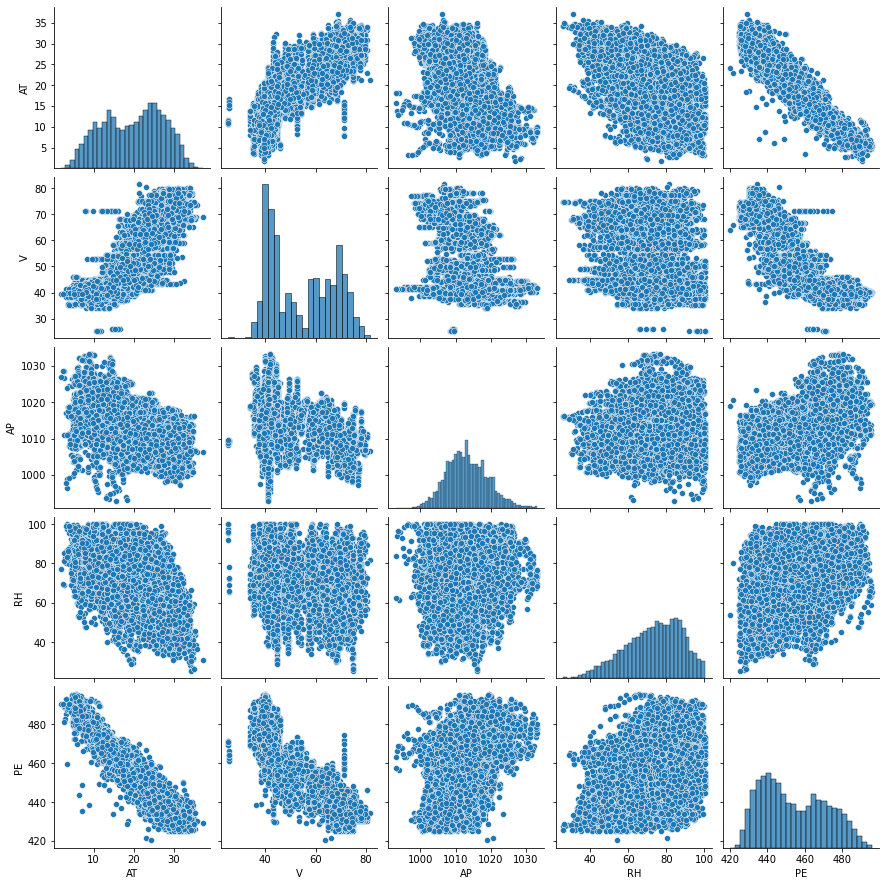

In [32]:
sns.pairplot(df)

In [40]:
def residual(model,feature,label):
    pred=model.predict(feature)
    df2=pd.DataFrame({"Actual":label,"predicted":pred})
    df2["residual"]=df2["Actual"]-df2["predicted"]
    return df2

In [41]:
model=LinearRegression()
model.fit(X,y)
residual(model,X,y)

,Actual,predicted,residual
0,463.26,467.269790,-4.009790
1,444.37,444.077366,0.292634
2,488.56,483.562643,4.997357
3,446.48,450.555668,-4.075668
4,473.90,471.825499,2.074501
...,...,...,...
9563,460.03,458.630177,1.399823
9564,469.62,472.358625,-2.738625
9565,429.57,432.405798,-2.835798
9566,435.74,443.036676,-7.296676


In [48]:
def test_linearity(model,X,y):
    df_res=residual(model,X,y)
    sns.lmplot(x="Actual",y="predicted",data=df_res,fit_reg=False)
    plt.scatter(df_res["Actual"],df_res["Predicted"])
    #sns.residplot(x="Actual",y="predicted",data=df_res)
    lim=np.arange(df_res.min().min(),df_res.max().max())
    plt.plot(lim,lim,"r--")
    plt.title("Test for Linearity")
    plt.show()

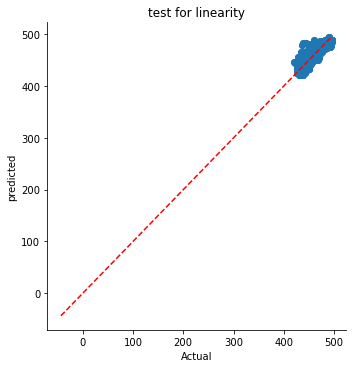

In [49]:
test_linearity(model,X,y)

## Test for Normality

In [55]:
#perform Shapiro-Wilk test
shapiro(X)

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.5875012874603271, pvalue=0.0)

In [56]:
from statsmodels.stats.stattools import jarque_bera
def Normality_test(model,X,y,thres=0.05):
    df_res=residual(model,X,y)
    _,p_val=normal_ad(df_res["residual"])
    _,jp_val,_,_=jarque_bera(df_res["residual"])
    print(p_val)
    print(jp_val)
    if p_val<thres:
        print("they are not normally distributed")
    else:
        print("normally distributed")
    sns.histplot(df_res["residual"],kde=True)

In [57]:
Description(X).summary()

nobs,9568.0,9568.0,9568.0,9568.0
missing,0.0,0.0,0.0,0.0
mean,19.65123118729102,54.30580372073601,1013.2590781772603,73.30897784280926
std_err,0.0007788956134626974,0.0013281660742398486,0.0006206922769451914,0.0015259478215644785
upper_ci,19.652757794641126,54.308406878407006,1013.2602947117687,73.31196864558181
lower_ci,19.649704579940916,54.30320056306501,1013.257861642752,73.3059870400367
std,7.452473229611089,12.707892998326871,5.938783705811591,14.60026875672893
iqr,12.209999999999999,24.800000000000004,8.159999999999968,21.502499999999998
iqr_normal,9.0512865439767,18.384267509469467,6.049017051502832,15.939827101708351
mad,6.426435756713474,11.64141626019984,4.733132465922617,12.021272449325913
mad_normal,8.05434278643883,14.590351577282998,5.932101833327791,15.066430709261496


2.585224173208246e-22
0.0
they are not normally distributed


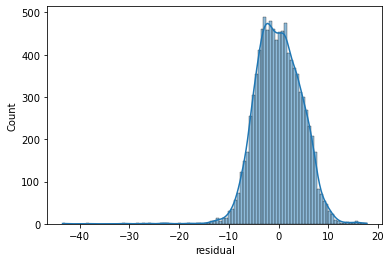

In [60]:
Normality_test(model,X,y)

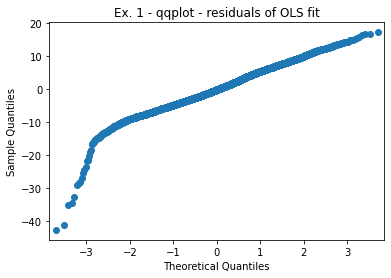

In [62]:
model = sm.OLS(y, X)
mod_fit = model.fit()
res = mod_fit.resid # residuals
pplot = sm.ProbPlot(res)
fig = pplot.qqplot()
h = plt.title("Ex. 1 - qqplot - residuals of OLS fit")
plt.show()

0.0
0.0
they are not normally distributed


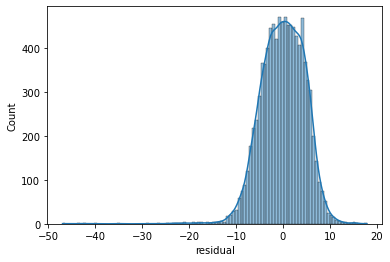

In [63]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
X=transformer.transform(X)
lr_transform=LinearRegression()
lr_transform.fit(X,y)
Normality_test(lr_transform,X,y)

## Test for Multicolinearity

<AxesSubplot:>

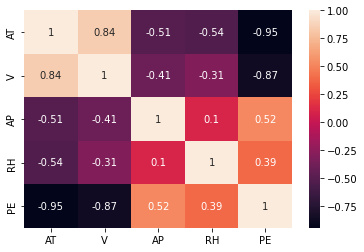

In [65]:
sns.heatmap(df.corr(),annot=True)

# Regularization

## Standarization using preprocessing.StandardScaler()

In [13]:
# we need to scale the data
sc=StandardScaler()
sc.fit(X_train)
X_scaled_train=sc.transform(X_train)
X_scaled_test=sc.transform(X_test)

### Ridge regularization on scaled dataset

In [14]:
ridge=Ridge()
ridge.fit(X_scaled_train,y_train)
print(f"training score --->{ridge.score(X_scaled_train,y_train)}")
print(f"testing score --->{ridge.score(X_scaled_test,y_test)}")

training score --->0.9273635189758876
testing score --->0.9339132385992865


In [15]:
alpha=[0.1,0.01,0.001,0.5,1,10,100,1000]
for i in alpha:
    ridge=Ridge(alpha=i)
    ridge.fit(X_scaled_train,y_train)
    print(f"training score --->{ridge.score(X_scaled_train,y_train)}")
    print(f"testing score --->{ridge.score(X_scaled_test,y_test)}")
    print("----------------------")

training score --->0.9273635822096228
testing score --->0.9339150574007645
----------------------
training score --->0.927363582843317
testing score --->0.9339152336660501
----------------------
training score --->0.9273635828496553
testing score --->0.9339152512362965
----------------------
training score --->0.9273635668624117
testing score --->0.9339142616333763
----------------------
training score --->0.9273635189758876
testing score --->0.9339132385992865
----------------------
training score --->0.9273573287837048
testing score --->0.9338895667177017
----------------------
training score --->0.926850117026086
testing score --->0.9332142080180881
----------------------
training score --->0.9119449853158079
testing score --->0.9169827515562448
----------------------


In [16]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", StandardScaler()), ("ridge", Ridge())])

In [17]:
alpha=[0.001,0.01,0.1,1,10,100,1000]
for i in alpha:
    pipe = Pipeline([("scaler", StandardScaler()), 
                     ("ridge", Ridge(alpha=i))])
    pipe.fit(X_train,y_train)
    print(f"training score --->{pipe.score(X_train,y_train)}")
    print(f"testing score --->{pipe.score(X_test,y_test)}")
    print("----------------------")

training score --->0.9273635828496553
testing score --->0.9339152512362965
----------------------
training score --->0.927363582843317
testing score --->0.9339152336660501
----------------------
training score --->0.9273635822096228
testing score --->0.9339150574007645
----------------------
training score --->0.9273635189758876
testing score --->0.9339132385992865
----------------------
training score --->0.9273573287837048
testing score --->0.9338895667177017
----------------------
training score --->0.926850117026086
testing score --->0.9332142080180881
----------------------
training score --->0.9119449853158079
testing score --->0.9169827515562448
----------------------


**We see the accuracy is around 92%. So, we try to preprocess dataset using normalize() this time.**

## Normalization using preprocessing.normalize()

,AT,V,AP,RH,PE
AT,1.000000,0.853046,0.940404,-0.507330,-0.932134
V,0.853046,1.000000,0.827891,-0.284977,-0.880354
AP,0.940404,0.827891,1.000000,-0.490010,-0.983720
RH,-0.507330,-0.284977,-0.490010,1.000000,0.345422
PE,-0.932134,-0.880354,-0.983720,0.345422,1.000000


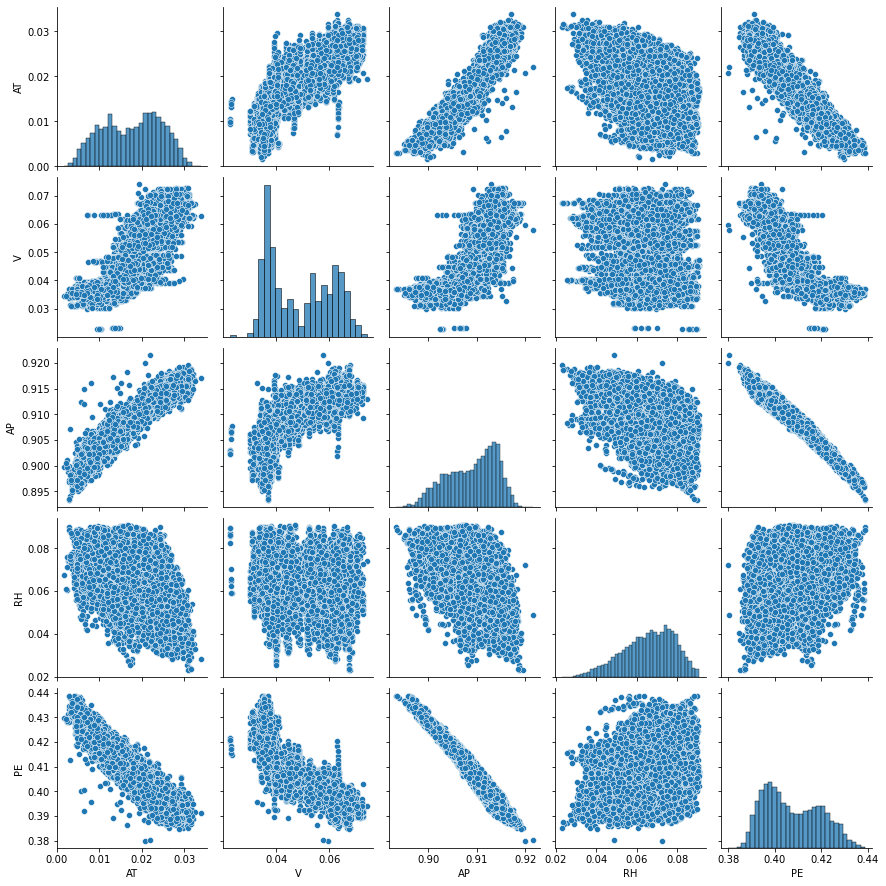

In [18]:
#normalizing the data:
df_nor=preprocessing.normalize(df)
df_nor=pd.DataFrame(df_nor)
df_nor.columns = df.columns
sns.pairplot(df_nor)
df_nor.corr()

[]

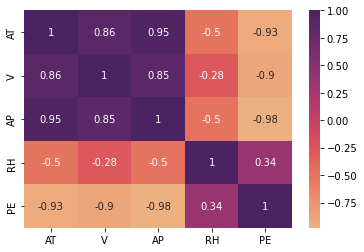

In [19]:
sns.heatmap(df_nor.corr(method="spearman"), annot=True, cmap='flare')
plt.plot()

**We infer from above heatmap that there is high negative correlation between AP, V, AT features with Power Output.
We also see the predictor features (AT and V) are highly correlated to each other. This is usually not a good thing as our features should be independent of each other. This problem is called multicollinearity.**

In [20]:
X_nor=df_nor.iloc[:,0:4]
y_nor=df_nor.iloc[:,4]

## Splitting train-test set on dataset after preprocessing.normalize

In [21]:
X_nor_train,X_nor_test,y_nor_train,y_nor_test=model_selection.train_test_split(X_nor,y_nor,test_size=0.2)
print(X_nor_train.shape)
print(X_nor_test.shape)
print(y_nor_train.shape)
print(y_nor_test.shape)

(7654, 4)
(1914, 4)
(7654,)
(1914,)


## Fitting linear model on dataset after preprocessing.normalize

In [22]:
lr_nor=LinearRegression()
lr_nor_model=lr_nor.fit(X_nor_train,y_nor_train)
pred=lr_nor.predict(X_nor_test)
print(pred)
print(lr_nor_model.coef_)
print(lr_nor_model.intercept_)

[0.4198282  0.39868349 0.39481636 ... 0.41614482 0.4199456  0.39508478]
[-0.06040521 -0.14264666 -2.13972134 -0.14734882]
2.370370792107482


In [23]:
print(f"training score--->{lr_nor_model.score(X_nor_train,y_nor_train)}")
print(f"testing score--->{lr_nor_model.score(X_nor_test,y_nor_test)}")

training score--->0.9990203818225087
testing score--->0.9989090872674452


# Checking Accuracy using different methods

## 1. Root Mean Squared Error (RMSE) 

It measures the average error performed by the model in predicting the outcome for an observation.

**The lower the RMSE score the better**

In [24]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_nor_test, pred)
rmse = np.sqrt(mse)
rmse

0.0003893495869002391

## 2. R-Squared

It means how much of the variation in the target variable that can be explained by the set of features used in training the model.

**The higher the R-squared score the better**

In [25]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_nor_test, pred)
r_squared

0.9989090872674452

## 3. Mean Absolute Error

It measures how far predicted values are away from the actual values.

**The lower the MAE value the better**

In [27]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_nor_test, pred)
mae

0.00030299263513110404

# Other Model

## Random Forest Regressor

### using original dataset

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [29]:
print(f"training score--->{rf_regressor.score(X_train,y_train)}")
print(f"testing score--->{rf_regressor.score(X_test,y_test)}")

training score--->0.9943194327422615
testing score--->0.9679473712608632


### using dataset after preprocessing.normalize

In [30]:
rf_regressor_nor= RandomForestRegressor()
rf_regressor_nor.fit(X_nor_train, y_nor_train)
y_pred_nor = rf_regressor_nor.predict(X_nor_test)

In [31]:
print(f"training score--->{rf_regressor_nor.score(X_nor_train,y_nor_train)}")
print(f"testing score--->{rf_regressor_nor.score(X_nor_test,y_nor_test)}")

training score--->0.9999157169755418
testing score--->0.999356301082461


# Conclusion

* There is high negative correlation between AP, V, AT features with Power Output
* We also see the predictor features (AT and V) are highly correlated to each other
* We don't see any change in the accuracy of linear regression model after using  ridge regularization
* Accuracy of linear regression model increased from 92% to 99% after preprocessing.normalize()
* Accuracy of random forest regressor model has increaded from 96% to 99% after preprocessing using normalize